<a href="https://colab.research.google.com/github/dipayandas97/Keras_Notebook/blob/master/CNN_AutoEncoder_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K


Using TensorFlow backend.


In [2]:
encoding_dim = 2

input_img = Input(shape=(28,28,1))

x = Conv2D(16, (3,3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2,2), padding = 'same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



W0824 17:22:24.995858 140048540616576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 17:22:25.048458 140048540616576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 17:22:25.059408 140048540616576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0824 17:22:25.113021 140048540616576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0824 17:22:25.161007 140048540616576 deprecation_wrapp

In [3]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

11493376/11490434 [==============================] - 1s 0us/step


In [4]:

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

W0824 17:22:27.273005 140048540616576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2381 - val_loss: 0.1843
Epoch 2/50
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1736 - val_loss: 0.1691
Epoch 3/50
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1586 - val_loss: 0.1559
Epoch 4/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1506 - val_loss: 0.1495
Epoch 5/50
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1466 - val_loss: 0.1382
Epoch 6/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1451 - val_loss: 0.1489
Epoch 7/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1419 - val_loss: 0.1434
Epoch 8/50
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1401 - val_loss: 0.1351
Epoch 9/50
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1377 - val_loss: 0.1325
Epoch

In [5]:
autoencoder.layers[6].input_shape

(None, 7, 7, 8)

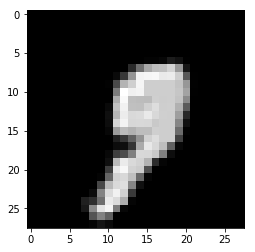

In [13]:
p = autoencoder.predict(x_test)

plt.imshow(p[1000].reshape(28,28))
plt.gray()
plt.show()